# PERCEPTRON SIMPLES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron, SGDClassifier
from matplotlib.animation import FuncAnimation
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

## Gerando Dados

Text(0.5, 1.0, 'Dados de Treinamento')

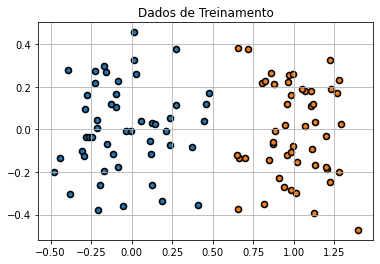

In [5]:
centers = [[0, 0], [1, 0]]
X, y = make_blobs(n_samples=100, centers=centers, cluster_std=0.2)
#X, y = shuffle(X, y)
for class_value in [0, 1]:
    row_ix = np.where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='viridis', edgecolors='k', linewidths=1.6)
plt.grid()
plt.title("Dados de Treinamento")

## Geração de GIFS de treinamento de uma EPOCH do Perceptron


In [6]:
# Gif generator of Perceptron Separation Surface
def surface_gif_generator(X, y):
    
    def update(i):
        if np.unique(y[0:i+1]).shape[0]<2:
            return ax
        label = 'timestep {0}'.format(i)
        np.random.seed
        clf = Perceptron(tol=1e-10, eta0=0.01, max_iter=1, shuffle=False)
        clf.fit(X[0:i+1,:], y[0:i+1])
        yhat=(clf.predict(grid))
        yhat=np.array(yhat)
        # reshape the predictions back into a grid
        zz = yhat.reshape(xx.shape)
        # plot the grid of x, y and z values as a surface
        ax.clear()
        ax.contourf(xx, yy, zz, cmap='Paired')
        # create scatter plot for samples from each class
        
        for class_value in [0, 1]:
            # get row indexes for samples with this class
            row_ix = np.where(y == class_value)
            # create scatter of these samples
            ax.scatter(X[row_ix, 0], X[row_ix, 1], cmap='viridis', edgecolors='k', linewidths=1.6)
        ax.scatter(X[i, 0], X[i, 1], c="green", edgecolors='k', linewidths=1.6, s=150)
        ax.set_xlabel(label)
        return ax

    fig, ax = plt.subplots(figsize=(6,5))
    fig.set_tight_layout(True)
    
    # decision surface for a binary classification dataset
    min1, max1 = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    min2, max2 = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    #grid = normalizer.transform(grid)
    # make predictions for the grid
    
    print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))
    
    for class_value in [0, 1]:
        row_ix = np.where(y == class_value)
        ax.scatter(X[row_ix, 0], X[row_ix, 1], cmap='viridis', edgecolors='k', linewidths=1.6)

    anim = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200)  
    anim.save('surface.gif', dpi=80, writer='imagemagick')
    plt.show()

fig size: 72.0 DPI, size in inches [6. 5.]


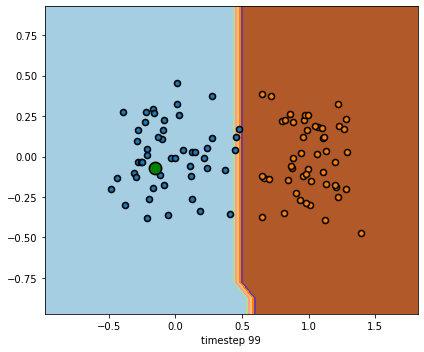

In [7]:
surface_gif_generator(X,y)

In [8]:
# Gif generator of the separation line created during Perceptron training
def line_gif_generator(X, y):
    
    def update(i):
        if np.unique(y[0:i+1]).shape[0]<2:
            return ax
        label = 'timestep {0}'.format(i)
        np.random.seed
        model = Perceptron(tol=1e-3, eta0=0.01, max_iter=1, shuffle=False)
        model.fit(X[0:i+1,:], y[0:i+1])
        b = model.intercept_ + 0.00001
        w1 = model.coef_[0][0]
        w2 = model.coef_[0][1]
        y_ = (-(b/w2)/(b/w1))*x + (-b/w2)
        # cleaning previous plots
        ax.clear()
        # separation line
        ax.plot(x, y_, 'r-', linewidth=2)
        ax.set_xlabel(label)
        # re-plotting the scatters
        for class_value in [0, 1]:
            row_ix = np.where(y == class_value)
            ax.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', edgecolors='k', linewidths=1.6)
        ax.scatter(X[i, 0], X[i, 1], c="green", edgecolors='k', linewidths=1.6, s=150)
        ax.set(xlim=(-1, 2), ylim=(-1, 1))
        ax.set_xlabel(label)
        return line, ax

    fig, ax = plt.subplots(figsize=(6,5))
    ax.set(xlim=(-1, 2), ylim=(-1, 1))
    fig.set_tight_layout(True)
    plt.title("Treinamento do Perceptron")

    for class_value in [0, 1]:
        row_ix = np.where(y == class_value)
        ax.scatter(X[row_ix, 0], X[row_ix, 1], cmap='viridis', edgecolors='k', linewidths=1.6)

    # Plot a scatter that persists (isn't redrawn) and the initial line.
    x = np.arange(-1, 2, 0.01)
    line, = ax.plot(x, x, 'r-', linewidth=2)

    anim = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200)
    anim.save('line.gif', dpi=80, writer='imagemagick')

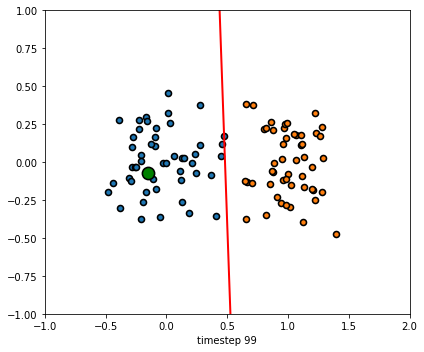

In [9]:
line_gif_generator(X,y)